In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import Pipeline
from math import sqrt

In [2]:
def import_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
bitcoin_all = import_data('D:\\Studia\\W8\\Praca magisterska\\praca_magisterska\\data\\raw\\BTC-USD.csv')

In [4]:
bitcoin_all['Date'] = pd.to_datetime(bitcoin_all['Date'], infer_datetime_format=True)
bitcoin_all = bitcoin_all.set_index('Date')

In [5]:
bitcoin_all.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
bitcoin_all[bitcoin_all.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bitcoin_all = bitcoin_all.dropna() #remove row with at least one NaN

In [8]:
bitcoin_all.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,1461.00,1461.00,1461.00,1461.00,1461.00,1.461000e+03
mean,6681.33,6849.06,6503.68,6689.56,6689.56,1.254723e+10
std,3622.76,3733.93,3488.55,3622.98,3622.98,1.265633e+10
min,654.00,664.42,653.70,657.59,657.59,5.260180e+07
25%,3848.26,3916.42,3733.75,3851.05,3851.05,2.800890e+09
50%,6971.18,7178.11,6793.82,6972.37,6972.37,7.073550e+09
75%,9292.84,9457.42,9141.25,9303.63,9303.63,1.963222e+10
max,19475.80,20089.00,18974.10,19497.40,19497.40,7.415677e+10


In [9]:
bitcoin_all

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-25,654.002014,664.424011,653.697998,657.588013,657.588013,9.037880e+07
2016-10-26,657.677979,679.728027,657.677979,678.304016,678.304016,8.887710e+07
2016-10-27,678.213989,688.593994,678.039978,688.312988,688.312988,9.610530e+07
2016-10-28,688.000000,690.443970,684.161987,689.651001,689.651001,8.114550e+07
2016-10-29,690.289001,720.401978,690.052002,714.479004,714.479004,1.347610e+08
...,...,...,...,...,...,...
2020-10-21,11913.077148,13184.566406,11900.928711,12823.689453,12823.689453,4.341471e+10
2020-10-22,12801.635742,13161.593750,12717.093750,12965.891602,12965.891602,3.472976e+10
2020-10-23,12971.548828,13015.961914,12752.647461,12931.539063,12931.539063,2.897498e+10


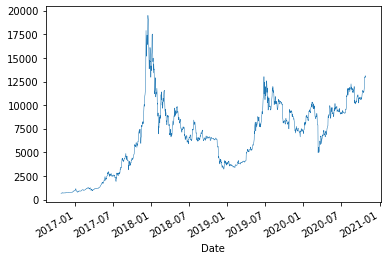

In [10]:
bitcoin_all['Close'].plot(linewidth=0.5);

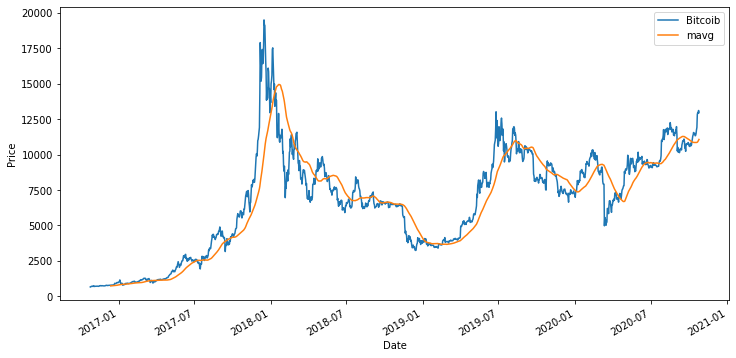

In [11]:
close_px = bitcoin_all['Close']
mavg = close_px.rolling(window=50).mean()
plt.figure(figsize = (12,6))
close_px.plot(label='Bitcoib')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [12]:
bitcoin_train=bitcoin_all['2016-10-25':'2019-10-25']
bitcoin_test=bitcoin_all['2019-10-26':'2020-10-25']

In [13]:
bitcoin_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-25,654.002014,664.424011,653.697998,657.588013,657.588013,9.037880e+07
2016-10-26,657.677979,679.728027,657.677979,678.304016,678.304016,8.887710e+07
2016-10-27,678.213989,688.593994,678.039978,688.312988,688.312988,9.610530e+07
2016-10-28,688.000000,690.443970,684.161987,689.651001,689.651001,8.114550e+07
2016-10-29,690.289001,720.401978,690.052002,714.479004,714.479004,1.347610e+08
...,...,...,...,...,...,...
2019-10-21,8225.115234,8296.694336,8196.416016,8243.720703,8243.720703,1.586875e+10
2019-10-22,8243.402344,8296.651367,8074.462891,8078.203125,8078.203125,1.680338e+10
2019-10-23,8076.228516,8092.999512,7469.322754,7514.671875,7514.671875,2.194288e+10


In [14]:
bitcoin_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-26,8667.577148,10021.744141,8662.622070,9244.972656,9244.972656,4.449626e+10
2019-10-27,9241.707031,9749.529297,9112.541992,9551.714844,9551.714844,3.259313e+10
2019-10-28,9565.101563,9805.118164,9256.148438,9256.148438,9256.148438,3.094826e+10
2019-10-29,9248.440430,9516.180664,9232.648438,9427.687500,9427.687500,2.842678e+10
2019-10-30,9422.462891,9426.874023,9085.370117,9205.726563,9205.726563,2.770653e+10
...,...,...,...,...,...,...
2020-10-21,11913.077148,13184.566406,11900.928711,12823.689453,12823.689453,4.341471e+10
2020-10-22,12801.635742,13161.593750,12717.093750,12965.891602,12965.891602,3.472976e+10
2020-10-23,12971.548828,13015.961914,12752.647461,12931.539063,12931.539063,2.897498e+10


In [29]:
n_scaler = MinMaxScaler()
bitcoin_train = n_scaler.fit_transform(bitcoin_train)
bitcoin_test = n_scaler.fit_transform(bitcoin_test)

In [32]:
s_scaler = StandardScaler()
bitcoin_train = s_scaler.fit_transform(bitcoin_train)
bitcoin_test = s_scaler.fit_transform(bitcoin_test)

We then convert our dates_df dates to integers by using mdates.date2num. We need the dates as integers because you can’t feed dates into Support Vector Machines and neural networks

In [47]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = bitcoin_train.copy()
dates_df = dates_df.reset_index()

# change the dates into ints for testing 
dates_df_test = bitcoin_test.copy()
dates_df_test = dates_df_test.reset_index()

# change the dates into ints for whole dataset 
dates_df_all = bitcoin_all.copy()
dates_df_all = dates_df_all.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']
org_dates_test = dates_df_test['Date']
org_dates_all = dates_df_all['Date']

# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)
dates_df_test['Date'] = dates_df_test['Date'].map(mdates.date2num)
dates_df_all['Date'] = dates_df_all['Date'].map(mdates.date2num)

dates_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1091,18190.0,8225.115234,8296.694336,8196.416016,8243.720703,8243.720703,1.586875e+10
1092,18191.0,8243.402344,8296.651367,8074.462891,8078.203125,8078.203125,1.680338e+10
1093,18192.0,8076.228516,8092.999512,7469.322754,7514.671875,7514.671875,2.194288e+10
1094,18193.0,7509.728027,7532.867676,7446.988770,7493.488770,7493.488770,1.626871e+10
1095,18194.0,7490.703125,8691.540039,7479.984375,8660.700195,8660.700195,2.870507e+10


In [18]:
org_dates

0      2016-10-25
1      2016-10-26
2      2016-10-27
3      2016-10-28
4      2016-10-29
          ...    
1091   2019-10-21
1092   2019-10-22
1093   2019-10-23
1094   2019-10-24
1095   2019-10-25
Name: Date, Length: 1096, dtype: datetime64[ns]

In [48]:
dates = dates_df['Date'].to_numpy()
prices = dates_df['Close'].to_numpy()
dates_test = dates_df_test['Date'].to_numpy()
prices_test = dates_df_test['Close'].to_numpy()
dates_all = dates_df_all['Date'].to_numpy()
prices_all = dates_df_all['Close'].to_numpy()

In [49]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
dates_test = np.reshape(dates_test, (len(dates_test), 1))
prices_test = np.reshape(prices_test, (len(prices_test), 1))
dates_all = np.reshape(dates_all, (len(dates_all), 1))
prices_all = np.reshape(prices_all, (len(prices_all), 1))

In [83]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', SVR(kernel="rbf", C= 1e1, gamma= 100, epsilon=0.001))])

prices_scaler = StandardScaler()
prices = prices_scaler.fit_transform(prices)
pipeline.fit(dates, prices.ravel())
prices_pred = prices_scaler.inverse_transform(pipeline.predict(dates_test))

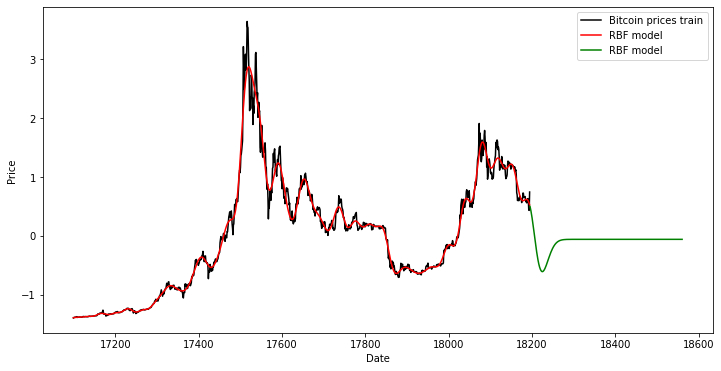

In [84]:
plt.figure(figsize = (12,6))
plt.plot(dates, prices_scaler.inverse_transform(prices), color= 'black', label= 'Bitcoin prices train')
#plt.plot(dates_test, prices_test, color= 'blue', label= 'Bitcoin prices test')
plt.plot(dates, prices_scaler.inverse_transform(pipeline.predict(dates)), color= 'red', label= 'RBF model') 
plt.plot(dates_test, prices_pred, color= 'green', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
 prices_pred


array([ 1.1013278 ,  1.0977378 ,  1.09402144,  1.09017903,  1.08621092,
        1.08211745,  1.077899  ,  1.07355595,  1.0690887 ,  1.06449767,
        1.05978329,  1.05494601,  1.0499863 ,  1.04490464,  1.03970151,
        1.03437744,  1.02893294,  1.02336856,  1.01768485,  1.01188238,
        1.00596174,  0.99992353,  0.99376836,  0.98749686,  0.98110968,
        0.97460747,  0.9679909 ,  0.96126065,  0.95441744,  0.94746196,
        0.94039496,  0.93321715,  0.9259293 ,  0.91853218,  0.91102656,
        0.90341324,  0.89569301,  0.8878667 ,  0.87993513,  0.87189915,
        0.86375961,  0.85551738,  0.84717333,  0.83872835,  0.83018334,
        0.82153921,  0.8127969 ,  0.80395732,  0.79502143,  0.78599017,
        0.77686453,  0.76764547,  0.75833397,  0.74893104,  0.73943768,
        0.72985491,  0.72018375,  0.71042523,  0.70058041,  0.69065032,
        0.68063604,  0.67053864,  0.66035918,  0.65009876,  0.63975848,
        0.62933943,  0.61884272,  0.60826948,  0.59762082,  0.58

In [43]:
dates_scaler = StandardScaler()
prices_scaler = StandardScaler()
dates = dates_scaler.fit_transform(dates)
prices = prices_scaler.fit_transform(prices)

In [18]:
dates

array([[17099.],
       [17100.],
       [17101.],
       ...,
       [18192.],
       [18193.],
       [18194.]])

In [ ]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(dates, prices.ravel())
    confidence = clf.score(dates, prices.ravel())
    print(k,confidence)

linear 0.2785011616609123


In [50]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices.ravel())

SVR(C=1000.0, gamma=0.1)

In [82]:
cv_method = KFold(len(dates))
gamma_range = [0.1, 0.001]
C_range = [2 ** i for i in range(1, 3, 1)]

tuned_parameters = [{
    'kernel': ['rbf'],
    'C': C_range,
    'gamma': gamma_range}]

# search for the best parameters with crossvalidation.
grid = GridSearchCV(SVR(kernel='rbf', epsilon = 0.1),\
    param_grid = tuned_parameters, cv=cv_method, verbose = 0)

grid.fit(dates, prices.ravel())

# train a SVR regressor with best found parameters.
svr_rbf = SVR(kernel='rbf', epsilon=0.1, C = grid.best_estimator.C,\
    gamma = grid.best_estimator.gamma)

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\asia\appdata\local\programs\python\python38\lib\site-pa

KeyboardInterrupt: 

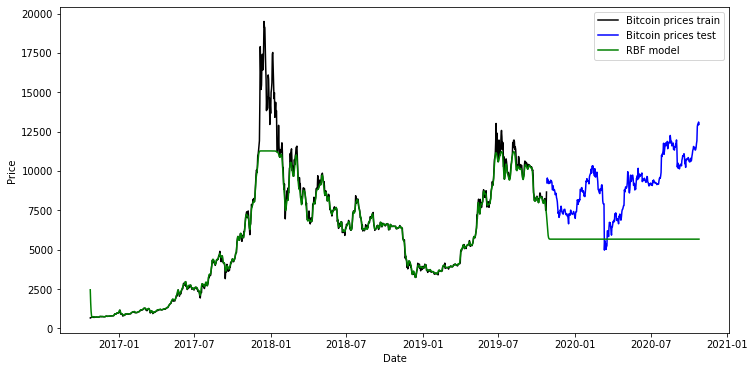

In [51]:
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Bitcoin prices train')
plt.plot(dates_test, prices_test, color= 'blue', label= 'Bitcoin prices test')
#plt.plot(org_dates_all, svr_rbf.predict(dates_all), color= 'red', label= 'RBF model') 
plt.plot(org_dates_all, svr_rbf.predict(dates_all), color= 'green', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
svr_rbf.score(dates,prices)

0.9372209206113477

In [55]:
print(svr_rbf.predict(dates_all))

[2448.49776582 1632.96863443 1085.6626741  ... 5666.14913927 5666.14913927
 5666.14913927]


In [36]:
error = sqrt(metrics.mean_squared_error(dates_test,svr_rbf.predict(prices_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 12711.514724190112


In [63]:
org_dates_test

0      2016-10-25
1      2016-10-26
2      2016-10-27
3      2016-10-28
4      2016-10-29
          ...    
1091   2019-10-21
1092   2019-10-22
1093   2019-10-23
1094   2019-10-24
1095   2019-10-25
Name: Date, Length: 1096, dtype: datetime64[ns]